In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

print("Train shape:", x_train.shape, "Test shape:", x_test.shape)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train shape: (50000, 32, 32, 3) Test shape: (10000, 32, 32, 3)


In [ ]:
def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

autoencoder, encoder = build_autoencoder()
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_split=0.1)

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 0.0269 - val_loss: 0.0077
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 12/20
176/176 ━━━━━━━━━━━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


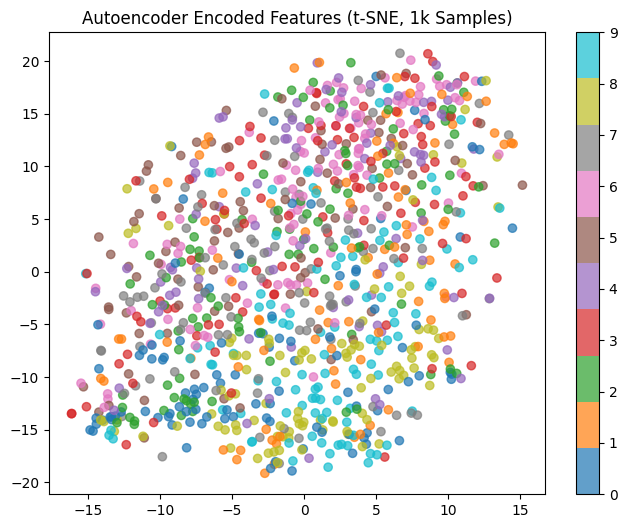

In [ ]:
# Use only a subset for faster computation
subset_size = 1000
x_test_small = x_test[:subset_size]
y_test_small = y_test[:subset_size]

# Extract features
encoded_features = encoder.predict(x_test_small)
flat_features = encoded_features.reshape((subset_size, -1))

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(flat_features)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=y_test_small.flatten(), cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title("Autoencoder Encoded Features (t-SNE, 1k Samples)")
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


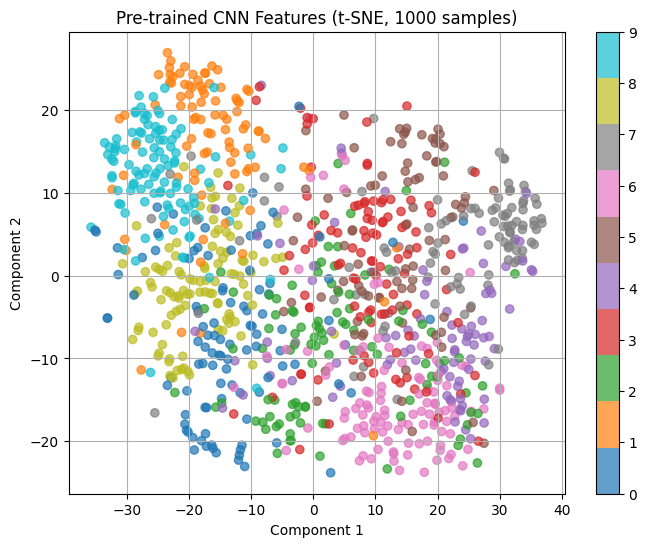

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3),
                                               include_top=False, weights='imagenet', pooling='avg')

# Resize CIFAR-10 to match input
x_test_resized = tf.image.resize(x_test_small, (96, 96))

features = base_model.predict(x_test_resized)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
features_tsne = tsne.fit_transform(features)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=y_test_small.flatten(), cmap='tab10', alpha=0.7)
plt.colorbar()
plt.title("Pre-trained CNN Features (t-SNE, 1000 samples)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0260 - val_loss: 0.0095
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0089 - val_loss: 0.0082
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0077 - val_loss: 0.0073
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 12/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 

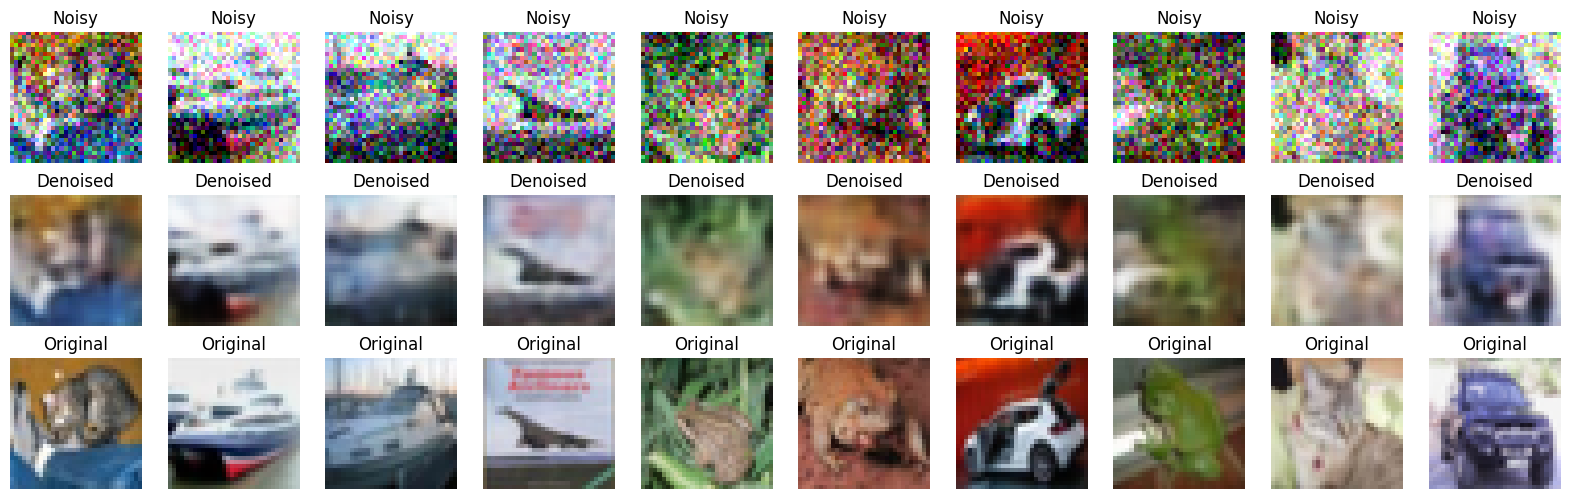

In [ ]:
def add_noise(images, noise_factor=0.2):
    noisy = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy, 0., 1.)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Reuse same architecture
denoise_autoencoder, _ = build_autoencoder()
denoise_autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_split=0.1)

# Display denoising result
n = 10
decoded_imgs = denoise_autoencoder.predict(x_test_noisy[:n])

plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Denoised
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis("off")

    # Original
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")
plt.show()


In [ ]:
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_no_aug = build_cnn_model()
history=cnn_no_aug.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=256)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.2902 - loss: 1.9427 - val_accuracy: 0.4548 - val_loss: 1.5192
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4823 - loss: 1.4483 - val_accuracy: 0.5312 - val_loss: 1.3208
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5391 - loss: 1.3033 - val_accuracy: 0.5647 - val_loss: 1.2316
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5717 - loss: 1.2114 - val_accuracy: 0.5786 - val_loss: 1.1872
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6072 - loss: 1.1245 - val_accuracy: 0.6088 - val_loss: 1.1114
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6314 - loss: 1.0642 - val_accuracy: 0.6289 - val_loss: 1.0720
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6482 - loss: 1.0188 - val_accuracy: 0.6419 - val_loss: 1.0272
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6544 - loss: 0.9939 - val_accura

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

cnn_aug = build_cnn_model()
history1=cnn_aug.fit(datagen.flow(x_train, y_train, batch_size=256),
            epochs=10, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 31s 149ms/step - accuracy: 0.2726 - loss: 1.9712 - val_accuracy: 0.4636 - val_loss: 1.5030
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.4509 - loss: 1.5274 - val_accuracy: 0.5145 - val_loss: 1.3582
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.4896 - loss: 1.4336 - val_accuracy: 0.5489 - val_loss: 1.2773
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 142ms/step - accuracy: 0.5252 - loss: 1.3505 - val_accuracy: 0.5683 - val_loss: 1.2369
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 139ms/step - accuracy: 0.5428 - loss: 1.2919 - val_accuracy: 0.5819 - val_loss: 1.2058
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.5637 - loss: 1.2440 - val_accuracy: 0.5910 - val_loss: 1.2001
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.5715 - loss: 1.2173 - val_accuracy: 0.6199 - val_loss: 1.0970
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.5934 - loss: 1

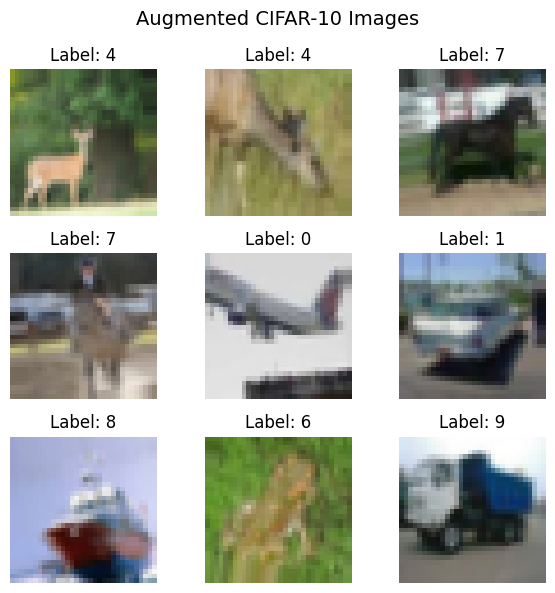

In [ ]:
import matplotlib.pyplot as plt

# Create an iterator
aug_iter = datagen.flow(x_train, y_train, batch_size=9)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
# Get one batch of augmented images
augmented_images, augmented_labels = next(aug_iter)

# Plot them in a 3x3 grid
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f"Label: {augmented_labels[i][0]}")
    plt.axis('off')
plt.suptitle("Augmented CIFAR-10 Images", fontsize=14)
plt.tight_layout()
plt.show()


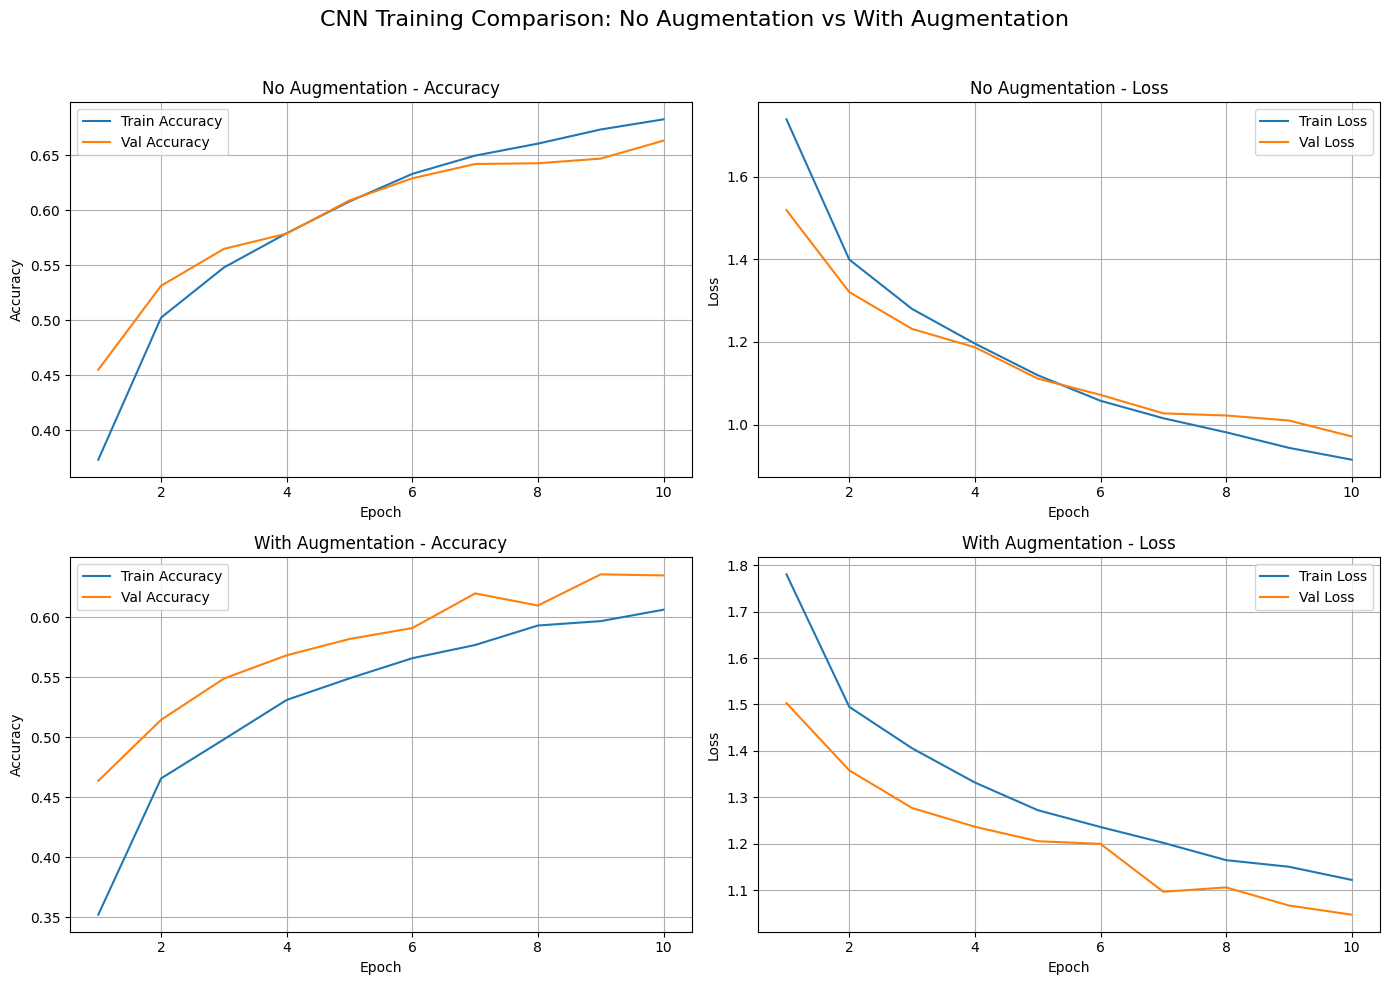

In [ ]:
# Extract metrics
acc_no_aug = history.history['accuracy']
val_acc_no_aug = history.history['val_accuracy']
loss_no_aug = history.history['loss']
val_loss_no_aug = history.history['val_loss']

acc_aug = history1.history['accuracy']
val_acc_aug = history1.history['val_accuracy']
loss_aug = history1.history['loss']
val_loss_aug = history1.history['val_loss']

epochs = range(1, len(acc_no_aug) + 1)

# Plot in 2x2 grid
plt.figure(figsize=(14, 10))

# 1st row: No Augmentation
plt.subplot(2, 2, 1)
plt.plot(epochs, acc_no_aug, label='Train Accuracy')
plt.plot(epochs, val_acc_no_aug, label='Val Accuracy')
plt.title('No Augmentation - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(epochs, loss_no_aug, label='Train Loss')
plt.plot(epochs, val_loss_no_aug, label='Val Loss')
plt.title('No Augmentation - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2nd row: With Augmentation
plt.subplot(2, 2, 3)
plt.plot(epochs, acc_aug, label='Train Accuracy' )
plt.plot(epochs, val_acc_aug, label='Val Accuracy')
plt.title('With Augmentation - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(epochs, loss_aug, label='Train Loss')
plt.plot(epochs, val_loss_aug, label='Val Loss')
plt.title('With Augmentation - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.suptitle("CNN Training Comparison: No Augmentation vs With Augmentation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
